In [11]:

from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances
from sklearn.metrics.pairwise import pairwise_distances

# Define two points in 3D space
P = [[2, 3, 5]]
Q = [[5, 7, 9]]

# Euclidean Distance
euclidean_dist = euclidean_distances(P, Q)[0][0]

# Manhattan Distance
manhattan_dist = manhattan_distances(P, Q)[0][0]

# Minkowski Distance (p=3)
minkowski_dist = pairwise_distances(P, Q, metric='minkowski', p=3)[0][0]

# Print results
print(f"Euclidean Distance: {euclidean_dist:.2f}")
print(f"Manhattan Distance: {manhattan_dist:.2f}")
print(f"Minkowski Distance (p=3): {minkowski_dist:.2f}")

Euclidean Distance: 6.40
Manhattan Distance: 11.00
Minkowski Distance (p=3): 5.37


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv("Week7_train.csv")

In [13]:
df.tail()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
df.shape

(42000, 785)

In [19]:
df.dtypes

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 785, dtype: object

In [27]:
pd.unique(df)

/tmp/ipykernel_4826/656283662.py:1: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  pd.unique(df)


ValueError: could not broadcast input array from shape (42000,785) into shape (42000,)

In [29]:
df.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [31]:
df.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [33]:
df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


(array([[42000.,     0.,     0., ...,     0.,     0.,     0.],
        [42000.,     0.,     0., ...,     0.,     0.,     0.],
        [42000.,     0.,     0., ...,     0.,     0.,     0.],
        ...,
        [42000.,     0.,     0., ...,     0.,     0.,     0.],
        [42000.,     0.,     0., ...,     0.,     0.,     0.],
        [42000.,     0.,     0., ...,     0.,     0.,     0.]]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 785 BarContainer objects>)

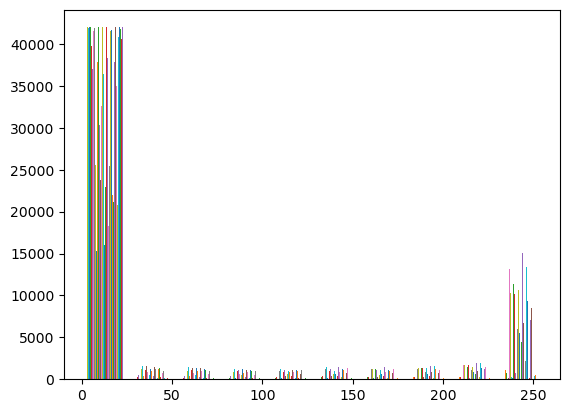

In [35]:
plt.hist(df)

In [65]:
from sklearn.model_selection import train_test_split
x = df.drop(columns=['label'],inplace=True)



In [69]:
x_train,x_test,y_train,y_test = train_test_split(x,df,train_size=0.1,random_state=42)

TypeError: Expected sequence or array-like, got <class 'NoneType'>

In [6]:
df_knn = df.sample(frac=0.1, random_state=42)

In [8]:
df_knn

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
5457,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38509,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25536,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31803,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39863,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16041,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4867,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28123,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3780,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
